In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# histogram of the image
def display_image_and_histogram(img):
    """Create a histogram of the image and plot the histogram.
    """
    image = cv2.imread(img, 0)
    
    # create a figure to hold both image and histogram
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    
    # display the image
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # calculate and plot the histogram of the image
    histogram = np.histogram(image.flatten(), bins=256)[0]
    axs[1].plot(histogram)
    axs[1].set_title('Histogram of Image')
    axs[1].axis([0, 256, 0, max(histogram)+3])
    axs[1].set_xlabel('Intensity Value')
    axs[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    

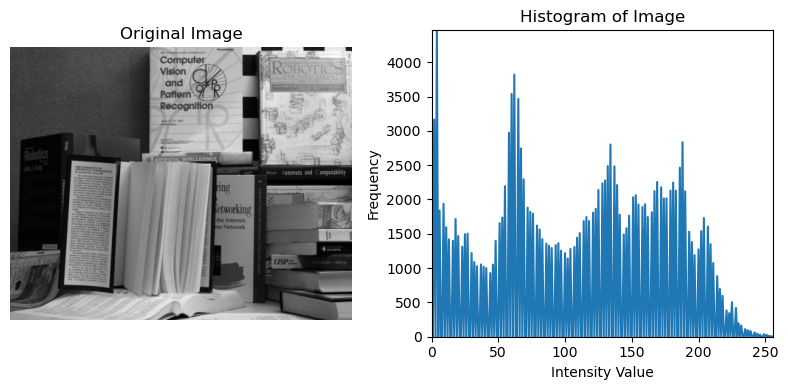

In [43]:
# read the image
display_image_and_histogram('Book1.png')

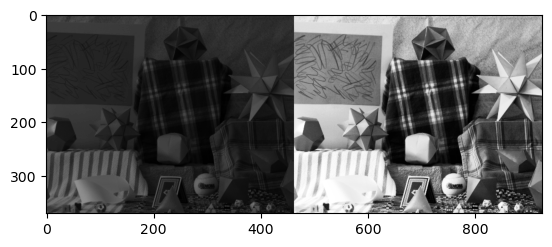

In [44]:
# histogram equalization
img = cv2.imread('scene.png', 0)
equalized = cv2.equalizeHist(img)
res = np.hstack((img, equalized))

plt.imshow(res, cmap='gray')

Input image shape:  (370, 463, 3)


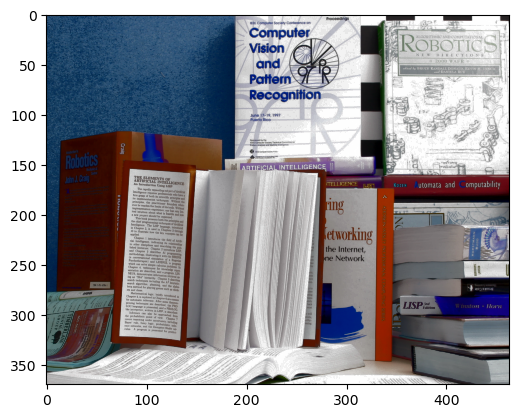

In [45]:
img = cv2.imread('Book4.png')
print('Input image shape: ', img.shape)

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format 
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imwrite('image_equalized.jpg', img_output)
plt.imshow(img_output)

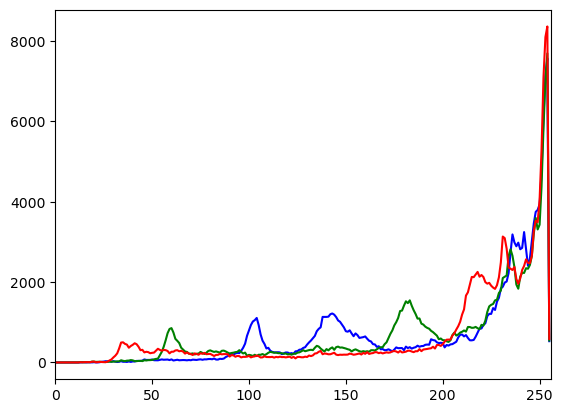

In [46]:
img = cv2.imread('Book4.png')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histogram = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col)
    plt.xlim([0, 256])
plt.show()

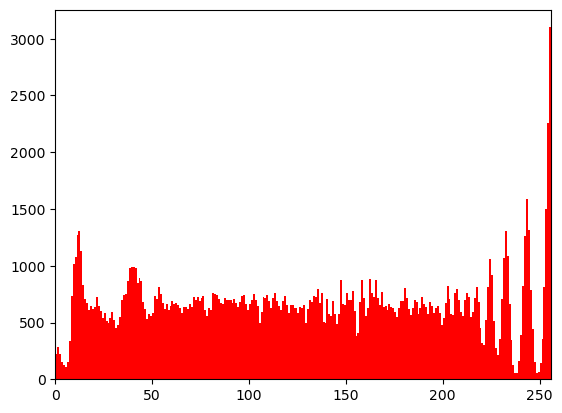

In [47]:
img = cv2.imread('image_equalized.jpg', 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.show()

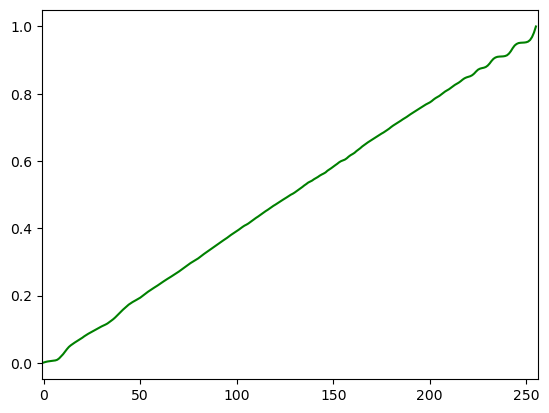

In [48]:
# cumulative distribution function
cdf = hist.cumsum()
cdf_normalized = cdf/cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.xlim([-1, 256])
plt.show()

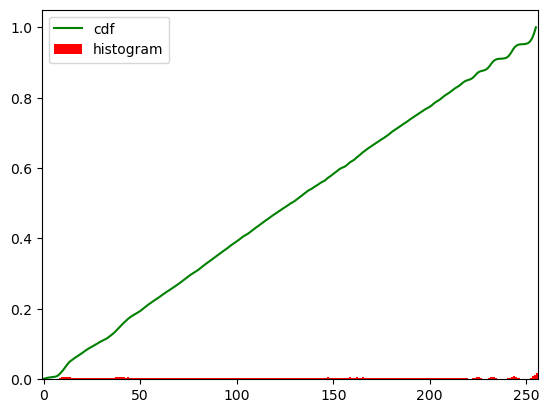

In [49]:
plt.plot(cdf_normalized, color = 'g')
plt.hist(img.flatten(), 256, [0, 256], color='r', density=True)
plt.legend(['cdf', 'histogram'], loc = 'upper left')
plt.xlim([-1, 256])
plt.show()